In [50]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# traigo mis funciones
import sys

sys.path.append('../src') #pongo los 2 puntos para que salga de la carpeta
import soporte_funciones as sf

# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [51]:
df = pd.read_csv('../datos_2/df_encoded.csv', index_col=0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 0 to 352
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      353 non-null    float64
 1   size                       353 non-null    float64
 2   municipality               353 non-null    float64
 3   distance                   353 non-null    int64  
 4   status                     353 non-null    float64
 5   floor                      353 non-null    float64
 6   hasLift                    353 non-null    float64
 7   propertyType_chalet        353 non-null    float64
 8   propertyType_countryHouse  353 non-null    float64
 9   propertyType_duplex        353 non-null    float64
 10  propertyType_flat          353 non-null    float64
 11  propertyType_penthouse     353 non-null    float64
 12  propertyType_studio        353 non-null    float64
 13  exterior_False             353 non-null    float64
 14 

In [53]:
df['propertyType_chalet'] = df['propertyType_chalet'].astype('O')
df['propertyType_countryHouse'] = df['propertyType_countryHouse'].astype('O')
df['propertyType_duplex'] = df['propertyType_duplex'].astype('O')
df['propertyType_flat'] = df['propertyType_flat'].astype('O')
df['propertyType_penthouse'] = df['propertyType_penthouse'].astype('O')
df['propertyType_studio'] = df['propertyType_studio'].astype('O')
df['exterior_False'] = df['exterior_False'].astype('O')
df['exterior_True'] = df['exterior_True'].astype('O')
df['rooms_0'] = df['rooms_0'].astype('O')
df['rooms_2'] = df['rooms_2'].astype('O')
df['rooms_3'] = df['rooms_3'].astype('O')
df['rooms_4'] = df['rooms_4'].astype('O')
df['rooms_1'] = df['rooms_1'].astype('O')
df['bathrooms_1'] = df['bathrooms_1'].astype('O')
df['bathrooms_2'] = df['bathrooms_2'].astype('O')
df['bathrooms_3'] = df['bathrooms_3'].astype('O')

In [54]:
df_num, df_cat = sf.separar_dataframe(df)

In [55]:
df_num

,price,size,municipality,distance,status,floor,hasLift
0,750.0,60.0,705.594114,7037,695.243827,697.689843,702.252872
1,750.0,70.0,701.418584,16145,695.243827,678.664014,687.633544
2,400.0,67.0,654.819074,55041,695.243827,696.092223,687.633544
3,590.0,70.0,679.539684,56596,695.243827,670.416613,687.633544
4,684.0,45.0,705.594114,10656,682.123310,670.416613,673.705516
...,...,...,...,...,...,...,...
348,640.0,69.0,686.045108,29311,695.243827,696.092223,702.252872
349,700.0,54.0,696.177593,11656,695.243827,701.698078,702.252872
350,700.0,59.0,705.594114,7529,695.243827,697.480890,702.252872
351,700.0,75.0,699.617387,30359,695.243827,701.698078,687.633544


In [56]:
cols_numericas = df_num.columns

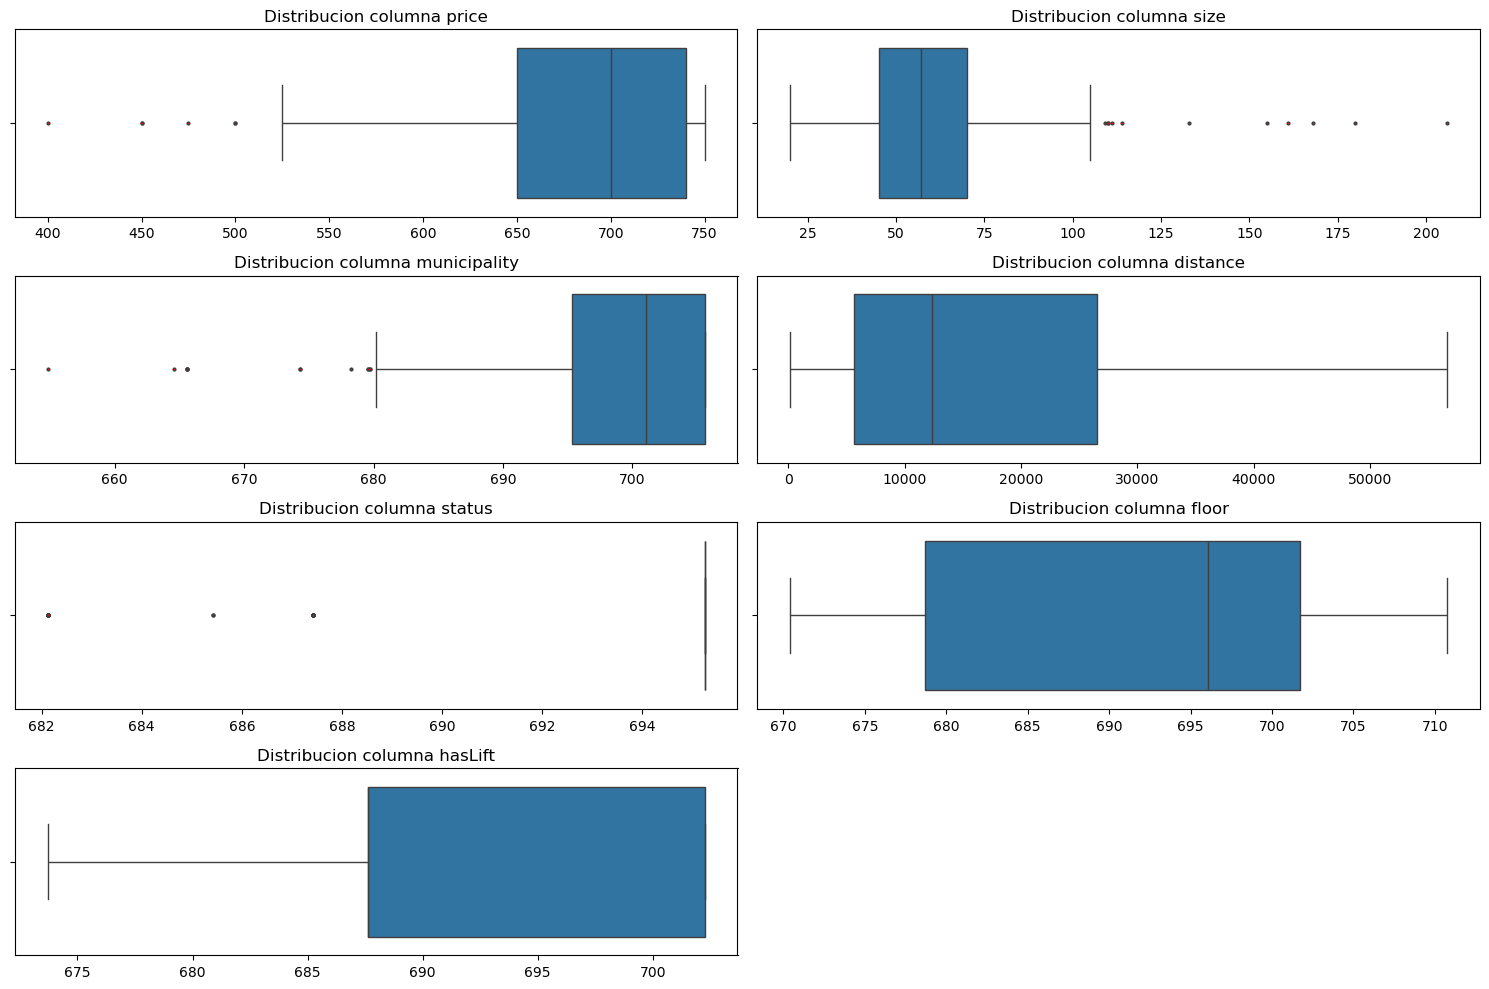

In [57]:
sf.plot_outliers_univariados(df,cols_numericas,'b',50)

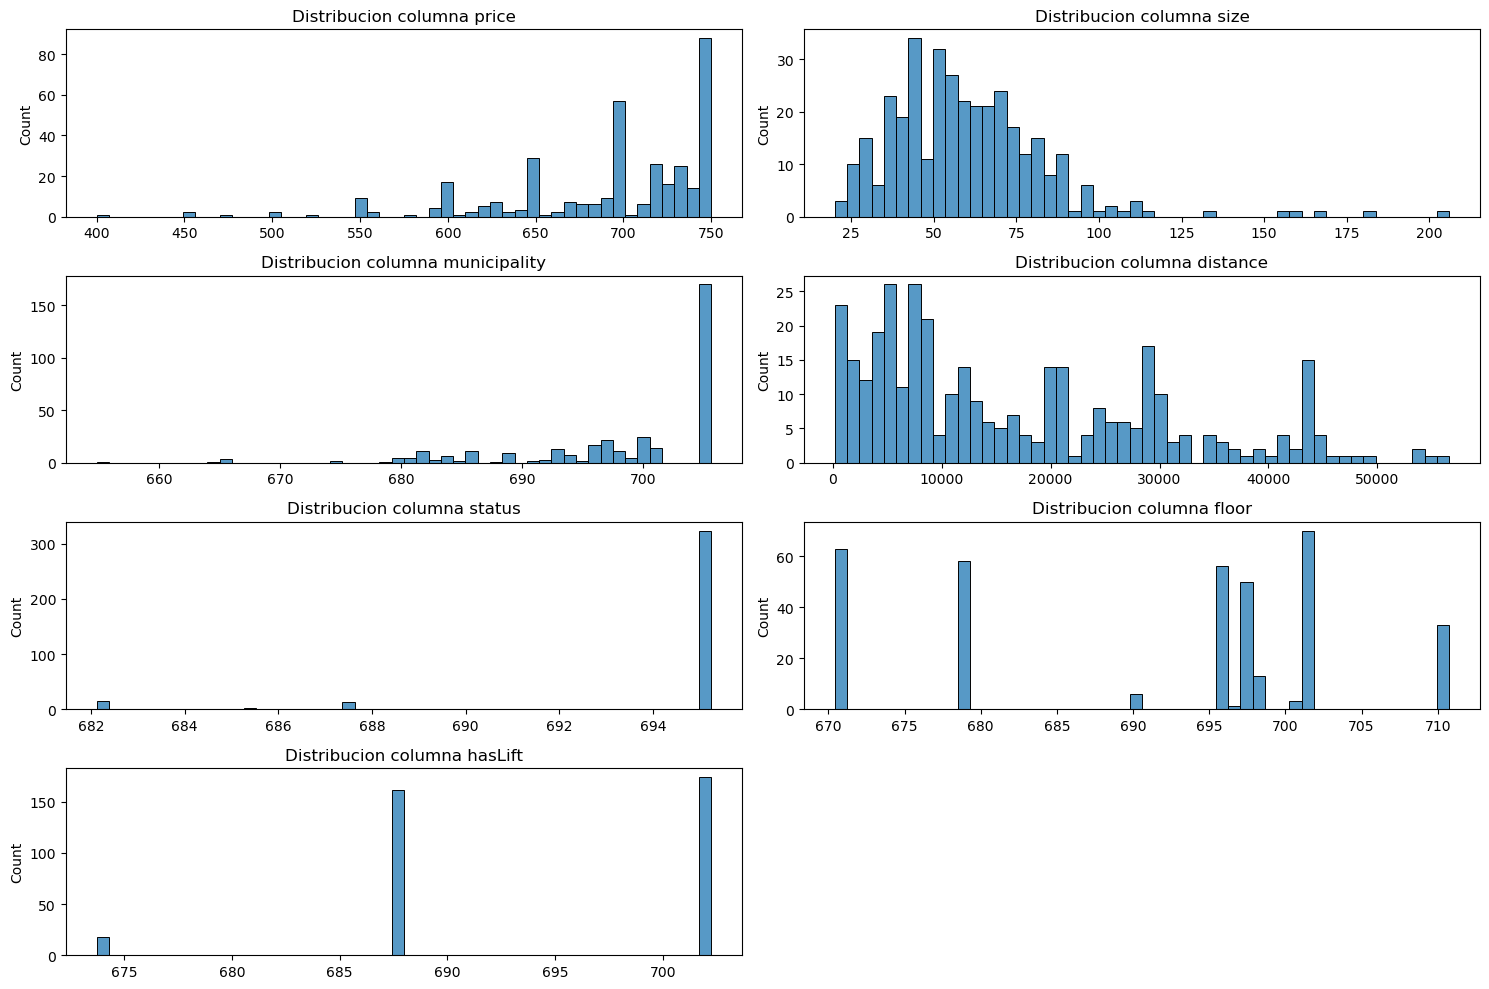

In [58]:
sf.plot_outliers_univariados(df, cols_numericas, 'h', 50)

In [59]:
diccionario_resultados_outliers = sf.identificar_outliers_iqr(df, cols_numericas)

La columna PRICE tiene 6 outliers
La columna SIZE tiene 11 outliers
La columna MUNICIPALITY tiene 13 outliers
La columna DISTANCE tiene 0 outliers
La columna STATUS tiene 29 outliers
La columna FLOOR tiene 0 outliers
La columna HASLIFT tiene 0 outliers


# Isolation Forest: identificar outliers

In [60]:
contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 150]

combinaciones = list(product(contaminacion, estimadores))
combinaciones

[(0.01, 10),
 (0.01, 100),
 (0.01, 150),
 (0.05, 10),
 (0.05, 100),
 (0.05, 150),
 (0.1, 10),
 (0.1, 100),
 (0.1, 150)]

In [61]:
for cont, esti in combinaciones:
    ifo = IsolationForest(random_state=42, #semilla de datos aleatorios
                        n_estimators=esti, #numero de arboles
                        contamination=cont,
                        n_jobs=-1) #nucleos del ordenador

    df[f'outliers_ifo_{cont}_{esti}'] = ifo.fit_predict(df[['price', 'size', 'distance']])

In [62]:
df.head()

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
0,750.0,60.0,705.594114,7037,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
1,750.0,70.0,701.418584,16145,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
2,400.0,67.0,654.819074,55041,695.243827,696.092223,687.633544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,590.0,70.0,679.539684,56596,695.243827,670.416613,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
4,684.0,45.0,705.594114,10656,682.123310,670.416613,673.705516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1


In [63]:
columnas_hue = df.filter(like='outlier').columns # se queda con todas las columnas de out

In [64]:
columnas_hue

Index(['outliers_ifo_0.01_10', 'outliers_ifo_0.01_100',
       'outliers_ifo_0.01_150', 'outliers_ifo_0.05_10',
       'outliers_ifo_0.05_100', 'outliers_ifo_0.05_150', 'outliers_ifo_0.1_10',
       'outliers_ifo_0.1_100', 'outliers_ifo_0.1_150'],
      dtype='object')

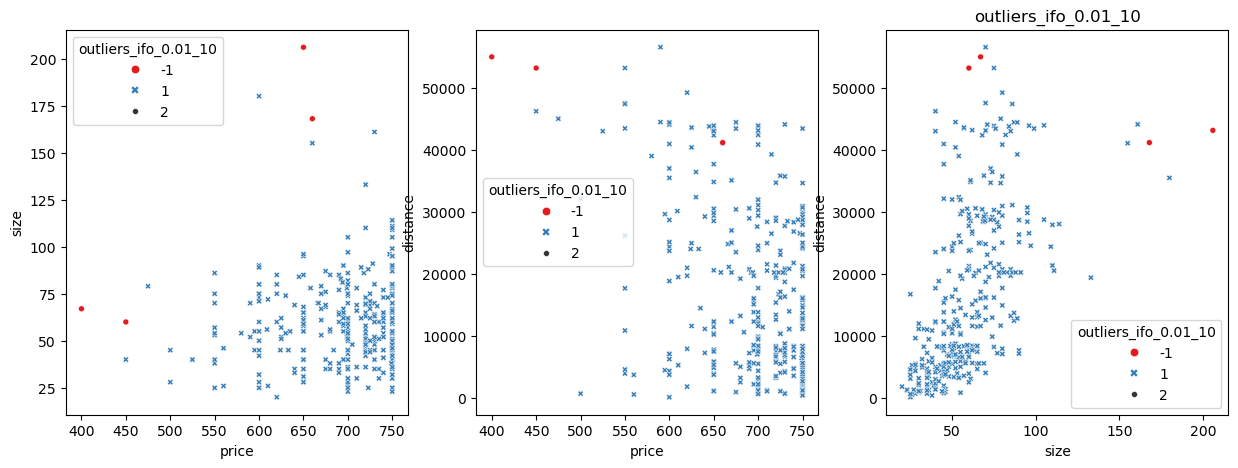

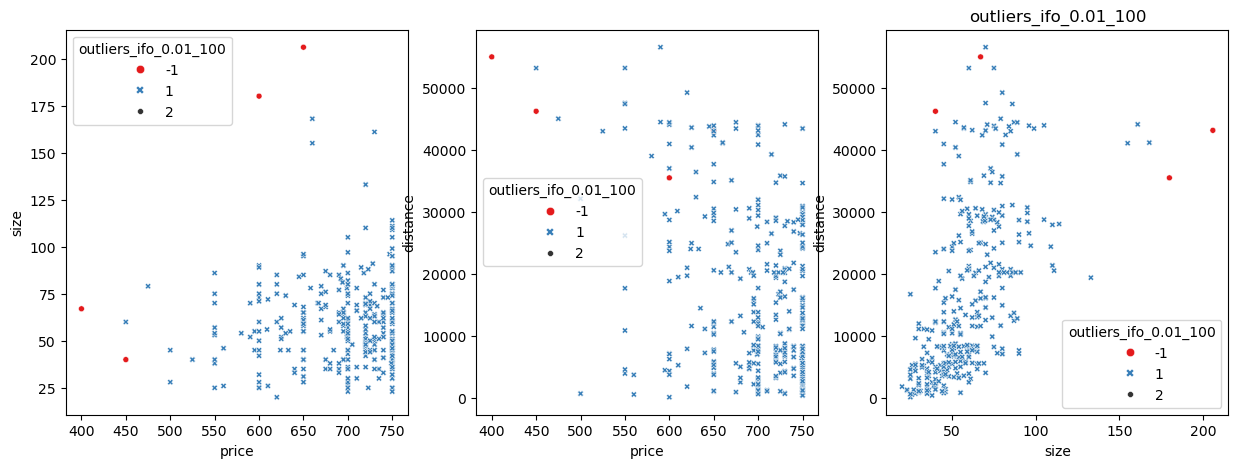

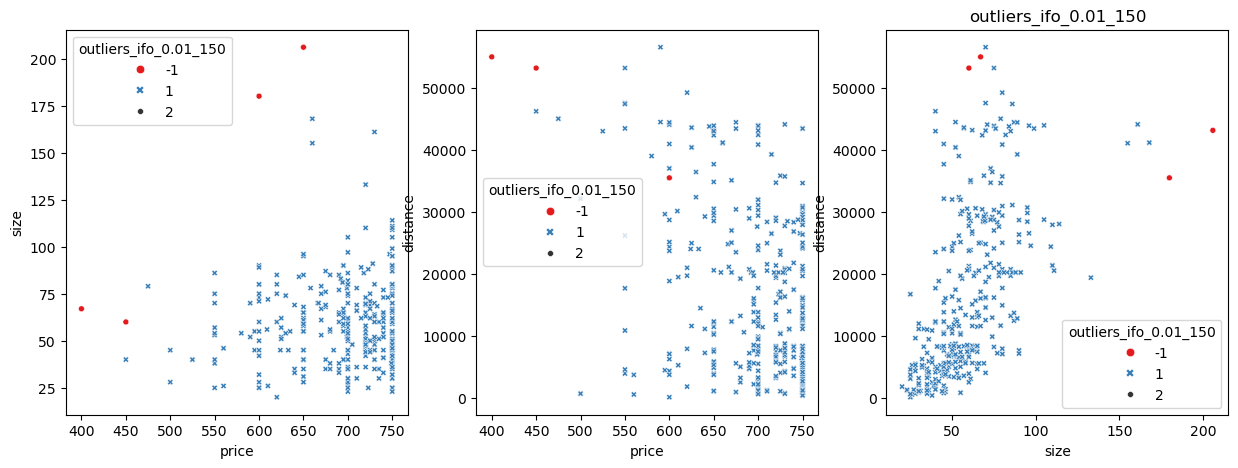

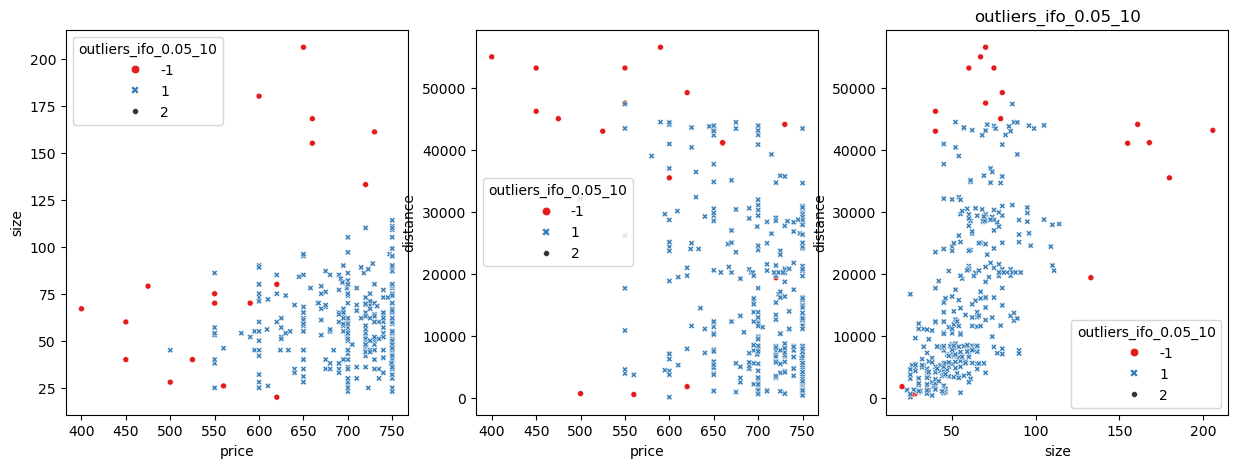

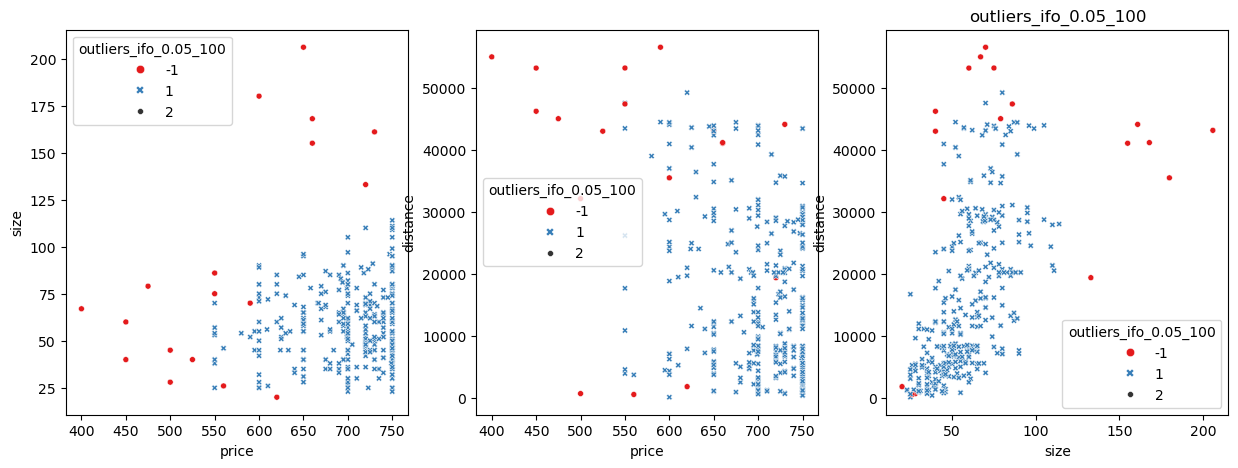

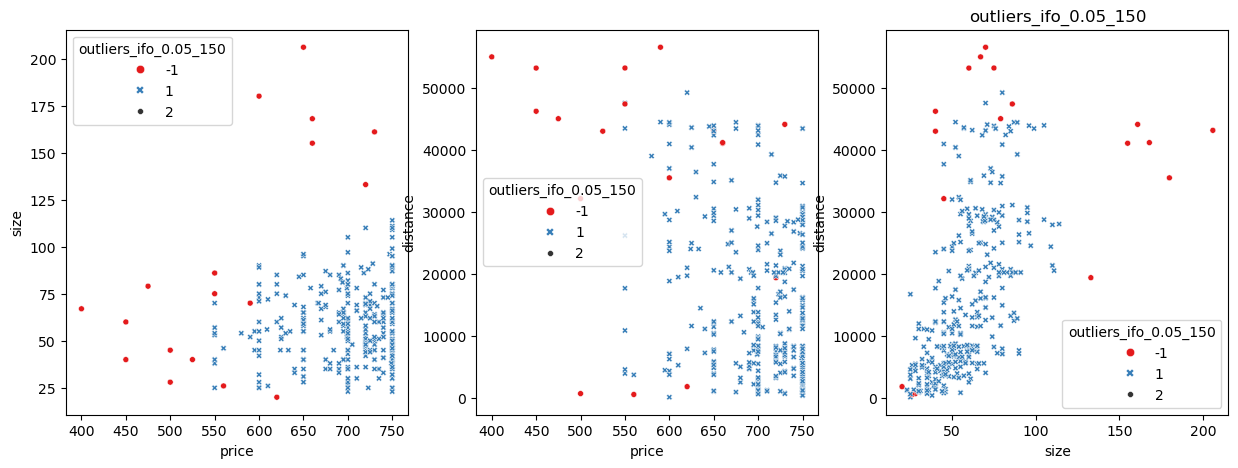

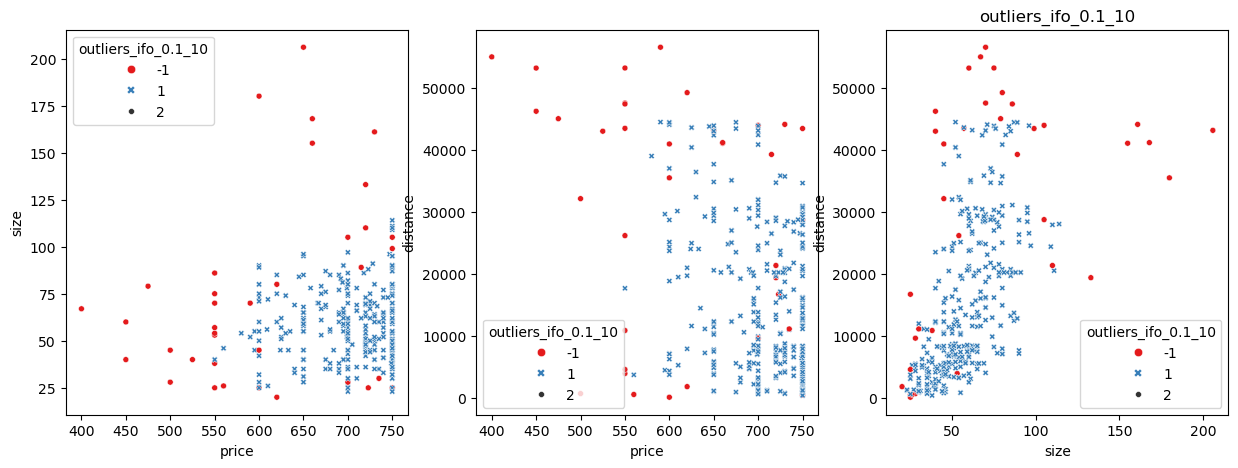

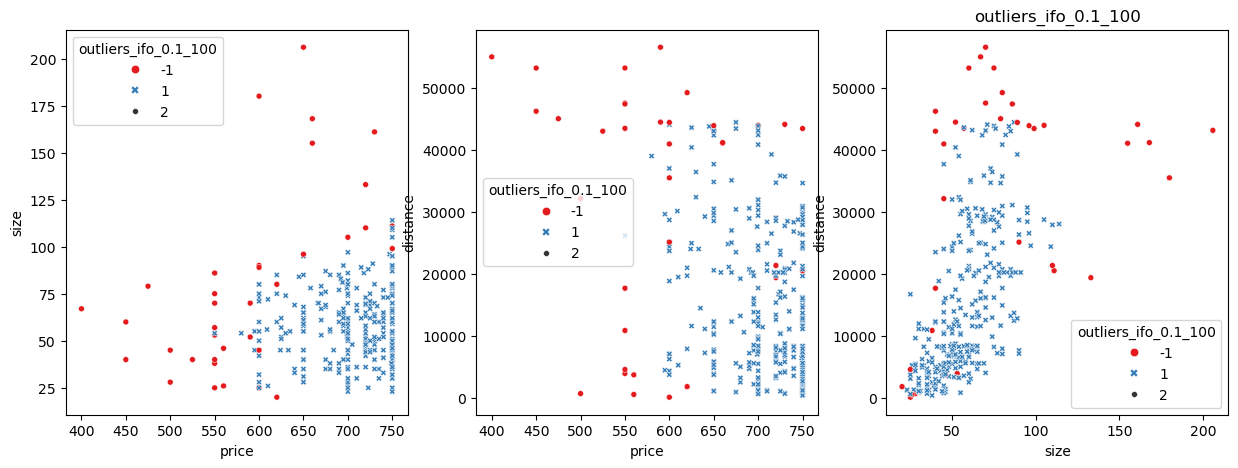

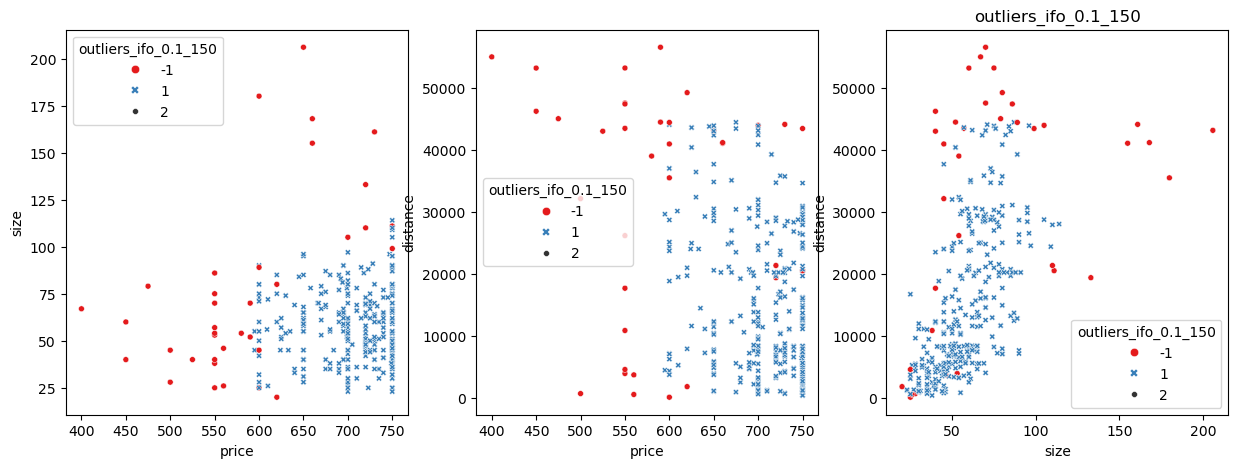

In [65]:
combinaciones_viz = list(combinations(['price', 'size', 'distance'], 2)) # hago combinaciones de 2
combinaciones_viz
for outlier in columnas_hue:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

    for indice, tupla in enumerate(combinaciones_viz):
        sns.scatterplot(x=tupla[0],
                        y=tupla[1], 
                        ax=axes[indice],
                        data=df,
                        style=outlier,
                        size=2,
                        hue=outlier, #aqui miro todos mis graficos para ver cual me muestra los mejores OUTL
                        palette='Set1')
        
    plt.title(f'{outlier}')

In [66]:
df.head()

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
0,750.0,60.0,705.594114,7037,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
1,750.0,70.0,701.418584,16145,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
2,400.0,67.0,654.819074,55041,695.243827,696.092223,687.633544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,590.0,70.0,679.539684,56596,695.243827,670.416613,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
4,684.0,45.0,705.594114,10656,682.123310,670.416613,673.705516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1


In [67]:
# Filtrar filas donde todas las columnas de 'columnas_hue' sean iguales a -1
filtered_df = df[(df[columnas_hue] == -1).all(axis=1)]


In [68]:
filtered_df

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
2,400.0,67.0,654.819074,55041,695.243827,696.092223,687.633544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1
18,650.0,206.0,688.615198,43195,695.243827,670.416613,673.705516,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [69]:
df_result = df[~df.index.isin(filtered_df.index)]

In [70]:
fragmento = 0.6 * len(columnas_hue)
df_fragmento_60 = df_result[df_result[columnas_hue].eq(-1).sum(axis=1) >= fragmento]

In [71]:
df_fragmento_60

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
3,590.0,70.0,679.539684,56596,695.243827,670.416613,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
47,500.0,28.0,705.594114,769,695.243827,701.698078,687.633544,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
55,720.0,133.0,689.079855,19453,695.243827,701.698078,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
136,560.0,26.0,705.594114,625,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
186,450.0,60.0,665.564400,53238,695.243827,670.416613,687.633544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,1,-1,-1,-1,-1,-1,-1,-1
188,550.0,75.0,665.564400,53247,695.243827,670.416613,687.633544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
191,660.0,155.0,681.704971,41119,682.123310,670.416613,673.705516,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
195,660.0,168.0,681.704971,41221,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1,1,1,-1,-1,-1,-1,-1,-1
225,730.0,161.0,681.704971,44159,695.243827,697.689843,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
241,475.0,79.0,664.577210,45077,695.243827,696.092223,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1


<Axes: xlabel='price', ylabel='size'>

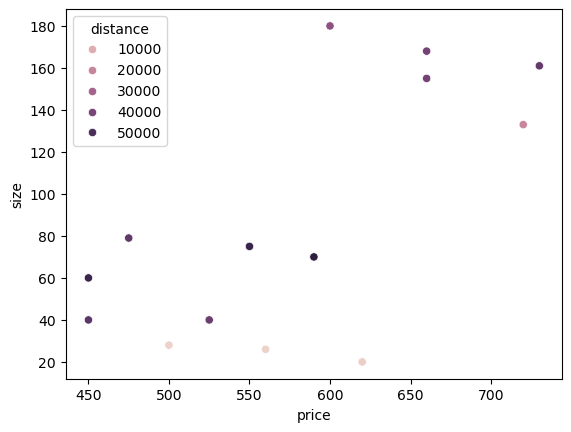

In [72]:
sns.scatterplot(x='price', y='size', hue='distance', data=df_fragmento_60)

In [73]:
df_elimino_1 = df_fragmento_60[(df_fragmento_60['size'] > 140) & (df['price'] > 550)]

In [74]:
df_elimino_2 = df_fragmento_60[(df_fragmento_60['size'] < 100) & (df['price'] < 550)]

In [75]:
eliminar_prueba_1 = df_elimino_1.index
df_result = df_result.drop(eliminar_prueba_1)

In [76]:
eliminar_prueba_2 = df_elimino_2.index
df_result = df_result.drop(eliminar_prueba_2)

In [77]:
df_result.reset_index(inplace=True, drop=True)

In [78]:
df_result

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_150,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_150,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_150
0,750.0,60.0,705.594114,7037,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
1,750.0,70.0,701.418584,16145,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
2,590.0,70.0,679.539684,56596,695.243827,670.416613,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,-1,-1,-1,-1,-1,-1
3,684.0,45.0,705.594114,10656,682.123310,670.416613,673.705516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
4,600.0,73.0,680.840769,37062,695.243827,697.689843,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,640.0,69.0,686.045108,29311,695.243827,696.092223,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
338,700.0,54.0,696.177593,11656,695.243827,701.698078,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
339,700.0,59.0,705.594114,7529,695.243827,697.480890,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1
340,700.0,75.0,699.617387,30359,695.243827,701.698078,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,1,1,1,1,1,1,1


<Axes: xlabel='price', ylabel='size'>

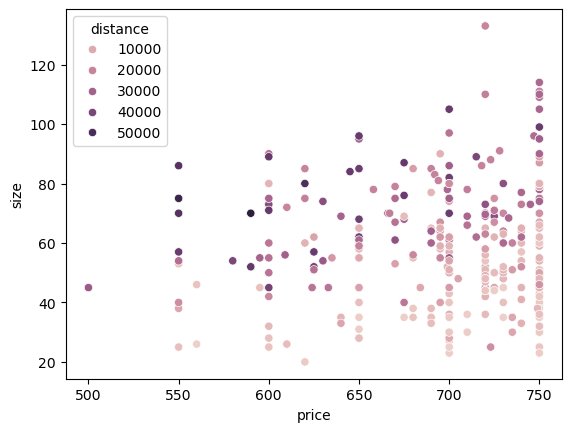

In [79]:
sns.scatterplot(x='price', y='size', hue='distance', data=df_result)

# Pendiente EDA

In [80]:
df_result.drop(columns=columnas_hue, inplace=True)

In [82]:
df_result.to_csv('..\\datos_2\\df_resultados_sin_out.csv')

In [1]:
df_result.shape

NameError: name 'df_result' is not defined